In [ ]:
from zipfile import ZipFile
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%%capture
!wget https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
!unzip /content/IND_adm.zip
!pip install geopandas

In [ ]:
all_state_mobility_zip = ZipFile("/content/drive/MyDrive/mobility_covid/mobility.zip")
od_mobility_df = pd.read_csv(all_state_mobility_zip.open("content/Odisha.csv"))
covid_cases = pd.read_csv("/content/drive/MyDrive/mobility_covid/phased_districts.csv")

In [ ]:
import geopandas as gpd
df=gpd.read_file("/content/IND_adm2.shp")
corrections = {
    "Angul":"Anugul",
    "Baragarh":"Bargarh",
    "Bolangir":"Balangir",
    "Boudh" : "Baudh",
    "Deogarh" : "Debagarh",
    "Jagatsinghpur":"Jagatsinghapur",
    "Jajpur":"Jajapur",
    "Keonjhar":"Kendujhar",
    "Nabarangpur":"Nabarangapur",
    "Sonepur":"Subarnapur"
}
for i in corrections:
  df["NAME_2"] = df["NAME_2"].str.replace(i,corrections[i])
districts = set(df[df['NAME_1']=="Orissa"]["NAME_2"].unique())
len(districts)

30

In [ ]:
len(districts.intersection(set(od_mobility_df[od_mobility_df['level']=="LEVEL3"]["start_polygon_name"].unique())))

30

In [ ]:
df[df['NAME_1']=="Orissa"].head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
361,105,IND,India,26,Orissa,362,Anugul,District,District,None,None,"POLYGON ((85.24497 21.67164, 85.25133 21.65029..."
362,105,IND,India,26,Orissa,363,Baleshwar,District,District,None,"Balasore, Baleswar","MULTIPOLYGON (((87.12389 21.51972, 87.12389 21..."
363,105,IND,India,26,Orissa,364,Bargarh,District,District,None,None,"POLYGON ((83.72012 21.62754, 83.74413 21.60620..."
364,105,IND,India,26,Orissa,365,Bhadrak,District,District,None,None,"MULTIPOLYGON (((86.85583 21.06360, 86.85611 21..."
365,105,IND,India,26,Orissa,366,Balangir,District,District,None,Balangir,"POLYGON ((83.36809 21.05959, 83.37424 21.05936..."


In [ ]:
od_mobility_df[od_mobility_df['level']=="LEVEL3"].head()

,Unnamed: 0,GEOMETRY,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,geometry,State
1806688,25,"LINESTRING (79.95849609375 20.61221818560859, ...",2021-03-08 00:00,1077682,Gadchiroli,1077680,Bhandara,16.483988,13,IN,LEVEL3,NaN,NaN,NaN,500.0,0.0,4.0,19.788582,80.240457,21.115517,79.762882,NaN,Odisha
1806697,34,"LINESTRING (84.27568359375 22.053801276567537,...",2021-03-08 00:00,1077531,Sundargarh,1077528,Jharsuguda,33.549447,13,IN,LEVEL3,NaN,NaN,NaN,4900.0,0.0,4.0,22.081162,84.507365,21.806762,83.942849,NaN,Odisha
1806702,39,LINESTRING (84.92431640625001 22.2484272279292...,2021-03-08 00:00,1077531,Sundargarh,1077525,Pashchimi Singhbhum,30.326006,13,IN,LEVEL3,NaN,NaN,NaN,100.0,0.0,4.0,22.081162,84.507365,22.420860,85.517806,NaN,Odisha
1806706,43,LINESTRING (79.65885653040716 17.3454857801058...,2021-03-08 00:00,1077813,Nalgonda,1077813,Nalgonda,0.052352,13,IN,LEVEL3,NaN,NaN,NaN,96500.0,0.0,4.0,17.069248,79.287434,17.069248,79.287434,NaN,Odisha
1806725,62,LINESTRING (79.69859372246944 17.9648875163849...,2021-03-08 00:00,1077814,Warangal,1077814,Warangal,0.108939,13,IN,LEVEL3,NaN,NaN,NaN,2908800.0,0.0,4.0,17.959637,79.804365,17.959637,79.804365,NaN,Odisha


In [ ]:
od_mobility_df[od_mobility_df["start_polygon_name"].isin(districts)]

,Unnamed: 0,GEOMETRY,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,geometry,State
3,LINESTRING (82.54271641673658 20.807121727978547,82.54247063758389 20.806110825002985),2020-08-15 16:00,1101945,Nuapada,1101945,Nuapada,0.115274,13,IN,LEVEL4,893.0,938.8,-45.8,-4.873377,0.0,-0.883272,20.772402,82.504168,20.772402,82.504168,NaN,Odisha
60,LINESTRING (84.02843128551136 21.862886221972076,84.02069091796875 21.821168544980342),2020-08-15 16:00,1101566,Jharsuguda,1101567,Badmal,4.707093,13,IN,LEVEL4,175.0,208.6,-33.6,-16.030534,0.0,-0.610576,21.877547,84.010157,21.795787,83.999597,NaN,Odisha
67,LINESTRING (85.10239814911913 20.120800568530953,85.10239814911913 20.12116054322352),2020-08-15 16:00,1101819,Nayagarh,1101819,Nayagarh,0.040027,13,IN,LEVEL4,1491.0,1503.8,-12.8,-0.850611,0.0,-0.147814,20.115719,85.103833,20.115719,85.103833,NaN,Odisha
206,LINESTRING (84.02055997810166 21.876464630578763,84.0206609437823 21.876359242699436),2020-08-15 16:00,1101566,Jharsuguda,1101566,Jharsuguda,0.015680,13,IN,LEVEL4,3481.0,3410.6,70.4,2.063548,0.0,0.215338,21.877547,84.010157,21.877547,84.010157,NaN,Odisha
214,LINESTRING (83.97861328125 21.865574327961863,83.91357421875001 21.841103294123787),2020-08-15 16:00,1101566,Jharsuguda,1101564,Orient,7.242895,13,IN,LEVEL4,27.0,23.0,4.0,16.666667,0.0,0.430083,21.877547,84.010157,21.834389,83.921983,NaN,Odisha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190429,3442,NaN,2021-10-10 16:00,1101730,Jagatsinghapur,1101732,Nuagaon,4.586546,13,IN,LEVEL4,NaN,NaN,NaN,-9.090909,0.0,-0.167910,20.289277,86.169936,20.122789,86.198896,"LINESTRING (86.17431640625 20.20034464114373, ...",Odisha
5190439,3452,NaN,2021-10-10 16:00,1101819,Nayagarh,1101845,Bhubaneswar,76.077170,13,IN,LEVEL4,NaN,NaN,NaN,341.176471,0.0,3.705484,20.115719,85.103833,20.300142,85.822512,"LINESTRING (85.10009765625 20.117838269767525,...",Odisha
5190483,3496,NaN,2021-10-10 16:00,1101730,Jagatsinghapur,1101758,Cuttack Town (M.C.),35.784010,13,IN,LEVEL4,NaN,NaN,NaN,57.894737,0.0,0.546594,20.289277,86.169936,20.475705,85.889191,"LINESTRING (86.15478515625 20.24158145188442, ...",Odisha
5190516,3529,NaN,2021-10-10 16:00,1101802,Anugul,1101802,Anugul,0.057595,13,IN,LEVEL4,3988.0,5473.2,-1485.2,-27.130905,0.0,-4.000000,20.852585,85.073818,20.852585,85.073818,LINESTRING (85.09124251057331 20.8532287071455...,Odisha


In [ ]:
covid_cases["Date"] = pd.to_datetime(covid_cases["Date"])
covid_cases.head()

,Unnamed: 0,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Phase
0,0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN,pre_1
1,1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN,pre_1
2,2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN,pre_1
3,3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN,pre_1
4,4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN,pre_1


In [ ]:
covid_working_1 = covid_cases[covid_cases['Date']>="2020-08-13"][covid_cases["State"]=="Odisha"].groupby(["Date","Phase"],as_index=False)["Confirmed"].sum()
covid_working_1["Daily"] = covid_working_1[["Date","Confirmed"]].diff()["Confirmed"]
covid_working_1

,Date,Phase,Confirmed,Daily
0,2020-08-13,wave_1,52653,NaN
1,2020-08-14,wave_1,54630,1977.0
2,2020-08-15,wave_1,57126,2496.0
3,2020-08-16,wave_1,60050,2924.0
4,2020-08-17,wave_1,62294,2244.0
...,...,...,...,...
440,2021-10-27,post_2,1039818,549.0
441,2021-10-28,post_2,1040230,412.0
442,2021-10-29,post_2,1040595,365.0
443,2021-10-30,post_2,1040969,374.0


In [ ]:
working_data_1 = od_mobility_df[["date_time","length_km","n_crisis","n_baseline","n_difference","percent_change","z_score","start_lat","start_lon","end_lat","end_lon"]]

In [ ]:
working_data_1['date'] = pd.to_datetime(working_data_1['date_time']).dt.date
working_data_1['time'] = pd.to_datetime(working_data_1['date_time']).dt.time
working_data_1.head()

,date_time,length_km,n_crisis,n_baseline,n_difference,percent_change,z_score,start_lat,start_lon,end_lat,end_lon,date,time
0,2020-08-15 16:00,0.104528,682.0,733.0,-51.0,-6.948229,-0.488234,20.948130,85.896120,20.948130,85.896120,2020-08-15,16:00:00
1,2020-08-15 16:00,0.045371,399.0,386.2,12.8,3.305785,0.496102,22.524867,86.557829,22.524867,86.557829,2020-08-15,16:00:00
2,2020-08-15 16:00,0.142558,399.0,440.4,-41.4,-9.379248,-0.974239,21.325767,85.754446,21.325767,85.754446,2020-08-15,16:00:00
3,2020-08-15 16:00,0.115274,893.0,938.8,-45.8,-4.873377,-0.883272,20.772402,82.504168,20.772402,82.504168,2020-08-15,16:00:00
4,2020-08-15 16:00,0.023549,435.0,438.4,-3.4,-0.773782,-0.074295,21.030705,83.762284,21.030705,83.762284,2020-08-15,16:00:00


In [ ]:
((682+399+399)-(733+386.2+440.4))

-79.59999999999991

In [ ]:
mean_z = working_data_1.groupby("date", as_index=False)['z_score'].mean()
mean_z['date'] = pd.to_datetime(mean_z['date'])
mean_z["daily_cases"] = covid_working_1["Daily"]
mean_z["phase"] = covid_working_1["Phase"]
mean_z['z_score'] = mean_z['z_score'].astype(float)
mean_z['7daymean'] = mean_z['z_score'].rolling(window=7).mean()
# mean_km
mean_z

,date,z_score,daily_cases,phase,7daymean
0,2020-08-13,0.670409,NaN,wave_1,NaN
1,2020-08-14,0.708223,1977.0,wave_1,NaN
2,2020-08-15,0.333100,2496.0,wave_1,NaN
3,2020-08-16,0.598285,2924.0,wave_1,NaN
4,2020-08-17,0.892981,2244.0,wave_1,NaN
...,...,...,...,...,...
440,2021-10-27,-0.447959,549.0,post_2,-0.302379
441,2021-10-28,-0.479740,412.0,post_2,-0.323382
442,2021-10-29,-0.436961,365.0,post_2,-0.342625
443,2021-10-30,-0.401908,374.0,post_2,-0.353945


Text(0.5, 1.0, 'Daily Trend of Z score and Average Movement in Odisha')

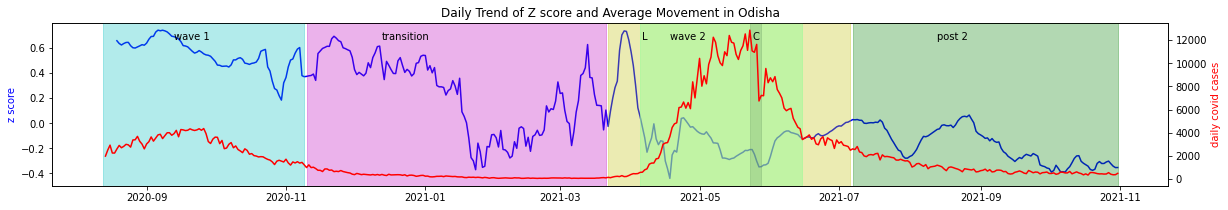

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
ax1 = plt.plot()
plt.plot(mean_z["date"].values,mean_z["7daymean"].values,c='b')
plt.ylabel('z score',color='b')

ax2 = plt.gca().twinx()
ax2.plot(mean_z["date"].values,mean_z["daily_cases"].values,c='r')
plt.ylabel('daily covid cases',color='r')
plt.axvspan(pd.to_datetime("2020-08-13"),pd.to_datetime("2020-11-09"), alpha=0.3, color='c')
plt.text(pd.to_datetime("2020-09-13"),12000,'wave 1', size=10)
plt.axvspan(pd.to_datetime("2020-11-10"),pd.to_datetime("2021-03-21"), alpha=0.3, color='m')
plt.text(pd.to_datetime("2020-12-13"),12000,'transition', size=10)
plt.axvspan(pd.to_datetime("2021-03-22"),pd.to_datetime("2021-07-06"), alpha=0.3, color='y')
plt.text(pd.to_datetime("2021-04-18"),12000,'wave 2', size=10)
plt.axvspan(pd.to_datetime("2021-07-07"),pd.to_datetime("2021-10-31"), alpha=0.3, color='g')
plt.text(pd.to_datetime("2021-08-13"),12000,'post 2', size=10)

plt.axvspan(pd.to_datetime("2021-05-23"),pd.to_datetime("2021-05-28"), alpha=0.2, color='k')
plt.text(pd.to_datetime("2021-05-24"),12000,'C', size=10)

plt.axvspan(pd.to_datetime("2021-04-05"),pd.to_datetime("2021-06-15"), alpha=0.5, color='palegreen')
plt.text(pd.to_datetime("2021-04-06"),12000,'L', size=10)

plt.title("Daily Trend of Z score and Average Movement in Odisha")

In [ ]:
mean_km = working_data_1.groupby("date", as_index=False)['length_km'].mean()
mean_km['date'] = pd.to_datetime(mean_km['date'])
mean_km['7daymean'] = mean_km.rolling(window=7).mean()
mean_km

,date,length_km,7daymean
0,2020-08-13,14.866196,NaN
1,2020-08-14,15.917226,NaN
2,2020-08-15,11.606473,NaN
3,2020-08-16,11.383753,NaN
4,2020-08-17,16.508048,NaN
...,...,...,...
440,2021-10-27,24.789095,25.270102
441,2021-10-28,24.183671,25.201861
442,2021-10-29,24.840930,25.092711
443,2021-10-30,25.463134,24.901631


In [ ]:
mean_km["daily_cases"] = covid_working_1["Daily"]
mean_km["phase"] = covid_working_1["Phase"]
mean_km['length_km'] = mean_km['length_km'].astype(float)
mean_km

,date,length_km,7daymean,daily_cases,phase
0,2020-08-13,14.866196,NaN,NaN,wave_1
1,2020-08-14,15.917226,NaN,1977.0,wave_1
2,2020-08-15,11.606473,NaN,2496.0,wave_1
3,2020-08-16,11.383753,NaN,2924.0,wave_1
4,2020-08-17,16.508048,NaN,2244.0,wave_1
...,...,...,...,...,...
440,2021-10-27,24.789095,25.270102,549.0,post_2
441,2021-10-28,24.183671,25.201861,412.0,post_2
442,2021-10-29,24.840930,25.092711,365.0,post_2
443,2021-10-30,25.463134,24.901631,374.0,post_2


Text(0.5, 1.0, 'Daily Trend of New Cases and Average Movement in Odisha')

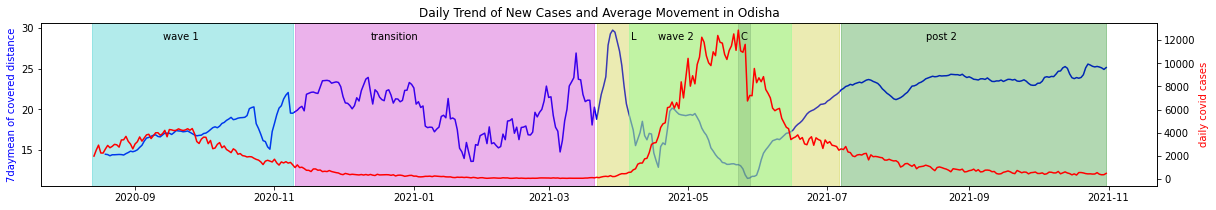

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
ax1 = plt.plot()
plt.plot(mean_km["date"].values,mean_km["7daymean"].values,c='b')
plt.ylabel('7daymean of covered distance',color='b')

ax2 = plt.gca().twinx()
ax2.plot(mean_km["date"].values,mean_km["daily_cases"].values,c='r')
plt.ylabel('daily covid cases',color='r')
plt.axvspan(pd.to_datetime("2020-08-13"),pd.to_datetime("2020-11-09"), alpha=0.3, color='c')
plt.text(pd.to_datetime("2020-09-13"),12000,'wave 1', size=10)
plt.axvspan(pd.to_datetime("2020-11-10"),pd.to_datetime("2021-03-21"), alpha=0.3, color='m')
plt.text(pd.to_datetime("2020-12-13"),12000,'transition', size=10)
plt.axvspan(pd.to_datetime("2021-03-22"),pd.to_datetime("2021-07-06"), alpha=0.3, color='y')
plt.text(pd.to_datetime("2021-04-18"),12000,'wave 2', size=10)
plt.axvspan(pd.to_datetime("2021-07-07"),pd.to_datetime("2021-10-31"), alpha=0.3, color='g')
plt.text(pd.to_datetime("2021-08-13"),12000,'post 2', size=10)

plt.axvspan(pd.to_datetime("2021-05-23"),pd.to_datetime("2021-05-28"), alpha=0.2, color='k')
plt.text(pd.to_datetime("2021-05-24"),12000,'C', size=10)

plt.axvspan(pd.to_datetime("2021-04-05"),pd.to_datetime("2021-06-15"), alpha=0.5, color='palegreen')
plt.text(pd.to_datetime("2021-04-06"),12000,'L', size=10)

plt.title("Daily Trend of New Cases and Average Movement in Odisha")

(0.0, 13000.0)

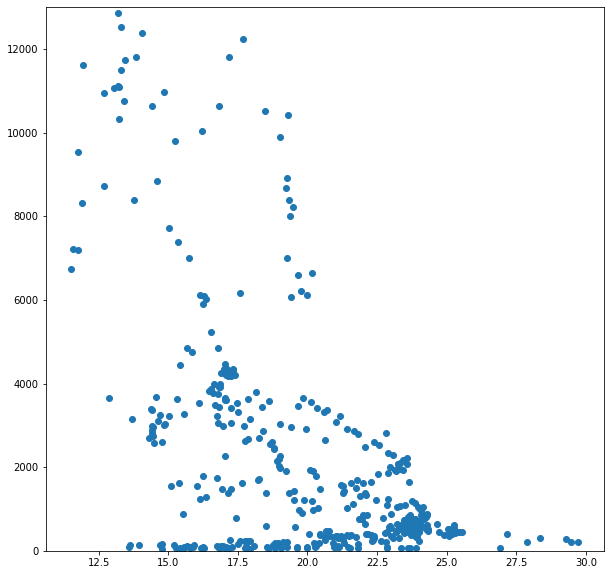

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
ax3 = plt.plot()
plt.scatter(mean_km["7daymean"],mean_km["daily_cases"])
# a,b = np.polyfit(mean_km["7daymean"].values,mean_km["daily_cases"].values,1)
# plt.plot(mean_km["7daymean"], a*mean_km["7daymean"].values + b)
plt.ylim([0,13000])

In [ ]:
all_state_mobility_zip = ZipFile("/content/drive/MyDrive/mobility_covid/mobility.zip")
wb_mobility_df = pd.read_csv(all_state_mobility_zip.open("content/West Bengal.csv"))
covid_cases = pd.read_csv("/content/drive/MyDrive/mobility_covid/phased_districts.csv")

In [ ]:
wb_mobility_df

,Unnamed: 0,GEOMETRY,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,geometry,State
0,0,"LINESTRING (85.84716796875 23.32949751666547, ...",2020-12-20 08:00,1077521,Ranchi,1077521,Ranchi,0.086416,13,IN,LEVEL3,728.0,869.8,-141.8,-16.283877,0.0,-4.000000,23.329453,85.372335,23.329453,85.372335,NaN,West Bengal
1,1,LINESTRING (89.4148635744135 26.62757867121967...,2020-12-20 08:00,1077502,Alipurduar,1077502,Alipurduar,0.045722,13,IN,LEVEL3,19052.0,21871.0,-2819.0,-12.888625,0.0,-4.000000,26.638997,89.462945,26.638997,89.462945,NaN,West Bengal
2,2,LINESTRING (86.59842354910714 22.4708098430938...,2020-12-20 08:00,1077514,Purbi Singhbhum,1077500,Paschim Medinipur,42.801869,13,IN,LEVEL3,43.0,38.8,4.2,10.552764,0.0,0.608121,22.583157,86.449865,22.409963,87.266500,NaN,West Bengal
3,3,LINESTRING (85.928044921875 25.383093904246483...,2020-12-20 08:00,1077374,Patna,1077374,Patna,0.049733,13,IN,LEVEL3,2498.0,3084.6,-586.6,-19.010889,0.0,-4.000000,25.456242,85.227469,25.456242,85.227469,NaN,West Bengal
4,4,"LINESTRING (86.34521484375 22.627322520757232,...",2020-12-20 08:00,1077514,Purbi Singhbhum,1077533,Mayurbhanj,56.681035,13,IN,LEVEL3,NaN,NaN,NaN,189.473684,0.0,2.311781,22.583157,86.449865,21.900665,86.404327,NaN,West Bengal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703997,549,NaN,2021-08-27 16:00,1229310,Rangpur,24676,Rajshahi,82.391971,13,BD,LEVEL2,80.0,42.8,37.2,84.931507,0.0,3.626896,25.771216,89.066043,24.589591,89.040116,LINESTRING (89.2461688701923 25.50147035593988...,West Bengal
703998,550,NaN,2021-08-27 16:00,24676,Rajshahi,1229310,Rangpur,14.862173,13,BD,LEVEL2,68.0,99.2,-31.2,-31.137725,0.0,-0.293463,24.589591,89.040116,25.771216,89.066043,LINESTRING (89.17848501632463 25.1367931064478...,West Bengal
703999,551,NaN,2021-08-27 16:00,640271,Kosi,640272,Mechi,10.582888,13,NP,LEVEL3,18.0,21.4,-3.4,-15.178571,0.0,-0.497000,27.143309,87.278199,27.157742,87.844954,LINESTRING (87.58688534007354 26.6474570137489...,West Bengal
704000,552,NaN,2021-08-27 16:00,640272,Mechi,640271,Kosi,11.520561,13,NP,LEVEL3,30.0,37.6,-7.6,-19.689119,0.0,-1.337249,27.157742,87.844954,27.143309,87.278199,LINESTRING (87.69287109375001 26.6512574152605...,West Bengal


In [ ]:
working_data_1 = wb_mobility_df[["date_time","length_km","n_crisis","n_baseline","n_difference","percent_change","z_score","start_lat","start_lon","end_lat","end_lon"]]

In [ ]:
working_data_1['date'] = pd.to_datetime(working_data_1['date_time']).dt.date
working_data_1['time'] = pd.to_datetime(working_data_1['date_time']).dt.time
working_data_1.head()

,date_time,length_km,n_crisis,n_baseline,n_difference,percent_change,z_score,start_lat,start_lon,end_lat,end_lon,date,time
0,2020-12-20 08:00,0.086416,728.0,869.8,-141.8,-16.283877,-4.000000,23.329453,85.372335,23.329453,85.372335,2020-12-20,08:00:00
1,2020-12-20 08:00,0.045722,19052.0,21871.0,-2819.0,-12.888625,-4.000000,26.638997,89.462945,26.638997,89.462945,2020-12-20,08:00:00
2,2020-12-20 08:00,42.801869,43.0,38.8,4.2,10.552764,0.608121,22.583157,86.449865,22.409963,87.266500,2020-12-20,08:00:00
3,2020-12-20 08:00,0.049733,2498.0,3084.6,-586.6,-19.010889,-4.000000,25.456242,85.227469,25.456242,85.227469,2020-12-20,08:00:00
4,2020-12-20 08:00,56.681035,NaN,NaN,NaN,189.473684,2.311781,22.583157,86.449865,21.900665,86.404327,2020-12-20,08:00:00


In [ ]:
((682+399+399)-(733+386.2+440.4))

-79.59999999999991

In [ ]:
mean_z = working_data_1.groupby("date", as_index=False)['z_score'].mean()
mean_z['date'] = pd.to_datetime(mean_z['date'])
mean_z["daily_cases"] = covid_working_1["Daily"]
mean_z["phase"] = covid_working_1["Phase"]
mean_z['z_score'] = mean_z['z_score'].astype(float)
mean_z['7daymean'] = mean_z['z_score'].rolling(window=7).mean()
# mean_km
mean_z

,date,z_score,daily_cases,phase,7daymean
0,2020-08-13,0.401925,NaN,wave_1,NaN
1,2020-08-14,0.492511,1977.0,wave_1,NaN
2,2020-08-15,0.287501,2496.0,wave_1,NaN
3,2020-08-16,0.326487,2924.0,wave_1,NaN
4,2020-08-17,0.499610,2244.0,wave_1,NaN
...,...,...,...,...,...
440,2021-10-27,0.079596,549.0,post_2,0.302067
441,2021-10-28,0.108423,412.0,post_2,0.272824
442,2021-10-29,0.012989,365.0,post_2,0.221531
443,2021-10-30,0.167377,374.0,post_2,0.176310


Text(0.5, 1.0, 'Daily Trend of Z score and Average Movement in West Bengal')

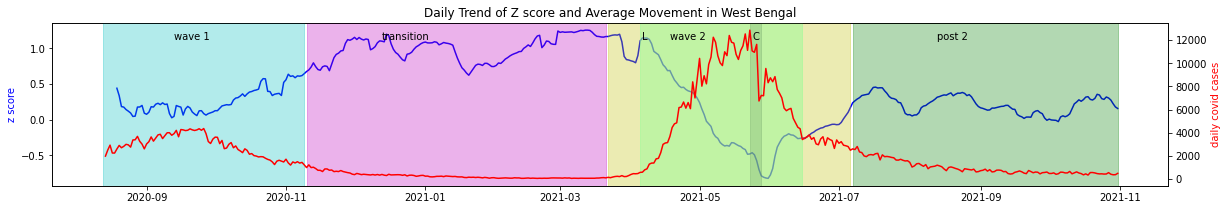

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
ax1 = plt.plot()
plt.plot(mean_z["date"].values,mean_z["7daymean"].values,c='b')
plt.ylabel('z score',color='b')

ax2 = plt.gca().twinx()
ax2.plot(mean_z["date"].values,mean_z["daily_cases"].values,c='r')
plt.ylabel('daily covid cases',color='r')
plt.axvspan(pd.to_datetime("2020-08-13"),pd.to_datetime("2020-11-09"), alpha=0.3, color='c')
plt.text(pd.to_datetime("2020-09-13"),12000,'wave 1', size=10)
plt.axvspan(pd.to_datetime("2020-11-10"),pd.to_datetime("2021-03-21"), alpha=0.3, color='m')
plt.text(pd.to_datetime("2020-12-13"),12000,'transition', size=10)
plt.axvspan(pd.to_datetime("2021-03-22"),pd.to_datetime("2021-07-06"), alpha=0.3, color='y')
plt.text(pd.to_datetime("2021-04-18"),12000,'wave 2', size=10)
plt.axvspan(pd.to_datetime("2021-07-07"),pd.to_datetime("2021-10-31"), alpha=0.3, color='g')
plt.text(pd.to_datetime("2021-08-13"),12000,'post 2', size=10)

plt.axvspan(pd.to_datetime("2021-05-23"),pd.to_datetime("2021-05-28"), alpha=0.2, color='k')
plt.text(pd.to_datetime("2021-05-24"),12000,'C', size=10)

plt.axvspan(pd.to_datetime("2021-04-05"),pd.to_datetime("2021-06-15"), alpha=0.5, color='palegreen')
plt.text(pd.to_datetime("2021-04-06"),12000,'L', size=10)

plt.title("Daily Trend of Z score and Average Movement in West Bengal")

In [ ]:
mean_km = working_data_1.groupby("date", as_index=False)['length_km'].mean()
mean_km['date'] = pd.to_datetime(mean_km['date'])
mean_km['7daymean'] = mean_km.rolling(window=7).mean()
mean_km

,date,length_km,7daymean
0,2020-08-13,32.890210,NaN
1,2020-08-14,33.393195,NaN
2,2020-08-15,32.780508,NaN
3,2020-08-16,30.744408,NaN
4,2020-08-17,36.685957,NaN
...,...,...,...
440,2021-10-27,70.664980,76.259231
441,2021-10-28,74.460860,75.941180
442,2021-10-29,73.360276,75.006881
443,2021-10-30,73.517692,74.305812


In [ ]:
mean_km["daily_cases"] = covid_working_1["Daily"]
mean_km["phase"] = covid_working_1["Phase"]
mean_km['length_km'] = mean_km['length_km'].astype(float)
mean_km

,date,length_km,7daymean,daily_cases,phase
0,2020-08-13,32.890210,NaN,NaN,wave_1
1,2020-08-14,33.393195,NaN,1977.0,wave_1
2,2020-08-15,32.780508,NaN,2496.0,wave_1
3,2020-08-16,30.744408,NaN,2924.0,wave_1
4,2020-08-17,36.685957,NaN,2244.0,wave_1
...,...,...,...,...,...
440,2021-10-27,70.664980,76.259231,549.0,post_2
441,2021-10-28,74.460860,75.941180,412.0,post_2
442,2021-10-29,73.360276,75.006881,365.0,post_2
443,2021-10-30,73.517692,74.305812,374.0,post_2


Text(0.5, 1.0, 'Daily Trend of New Cases and Average Movement in West Bengal')

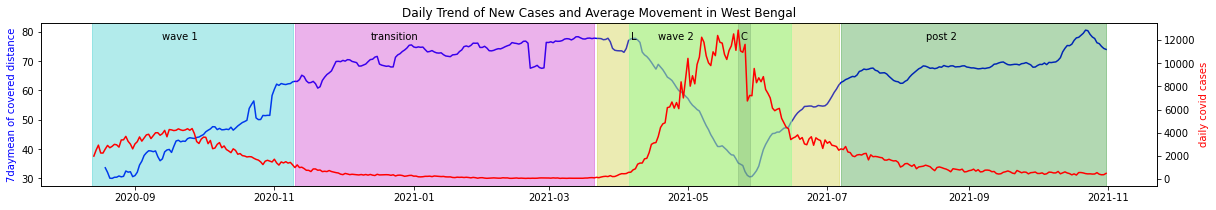

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
ax1 = plt.plot()
plt.plot(mean_km["date"].values,mean_km["7daymean"].values,c='b')
plt.ylabel('7daymean of covered distance',color='b')

ax2 = plt.gca().twinx()
ax2.plot(mean_km["date"].values,mean_km["daily_cases"].values,c='r')
plt.ylabel('daily covid cases',color='r')
plt.axvspan(pd.to_datetime("2020-08-13"),pd.to_datetime("2020-11-09"), alpha=0.3, color='c')
plt.text(pd.to_datetime("2020-09-13"),12000,'wave 1', size=10)
plt.axvspan(pd.to_datetime("2020-11-10"),pd.to_datetime("2021-03-21"), alpha=0.3, color='m')
plt.text(pd.to_datetime("2020-12-13"),12000,'transition', size=10)
plt.axvspan(pd.to_datetime("2021-03-22"),pd.to_datetime("2021-07-06"), alpha=0.3, color='y')
plt.text(pd.to_datetime("2021-04-18"),12000,'wave 2', size=10)
plt.axvspan(pd.to_datetime("2021-07-07"),pd.to_datetime("2021-10-31"), alpha=0.3, color='g')
plt.text(pd.to_datetime("2021-08-13"),12000,'post 2', size=10)

plt.axvspan(pd.to_datetime("2021-05-23"),pd.to_datetime("2021-05-28"), alpha=0.2, color='k')
plt.text(pd.to_datetime("2021-05-24"),12000,'C', size=10)

plt.axvspan(pd.to_datetime("2021-04-05"),pd.to_datetime("2021-06-15"), alpha=0.5, color='palegreen')
plt.text(pd.to_datetime("2021-04-06"),12000,'L', size=10)

plt.title("Daily Trend of New Cases and Average Movement in West Bengal")

(0.0, 13000.0)

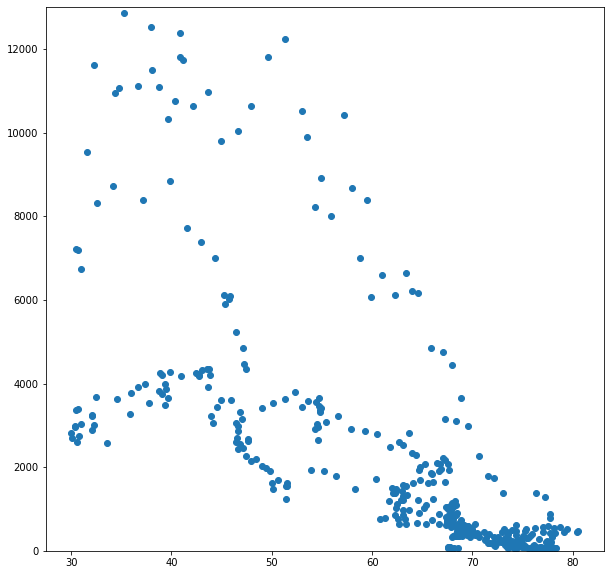

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
ax3 = plt.plot()
plt.scatter(mean_km["7daymean"],mean_km["daily_cases"])
# a,b = np.polyfit(mean_km["7daymean"].values,mean_km["daily_cases"].values,1)
# plt.plot(mean_km["7daymean"], a*mean_km["7daymean"].values + b)
plt.ylim([0,13000])